In [1]:
# MI Vs DC Match IPL Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


C:\Users\vr00574274\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [84]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [133]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [85]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

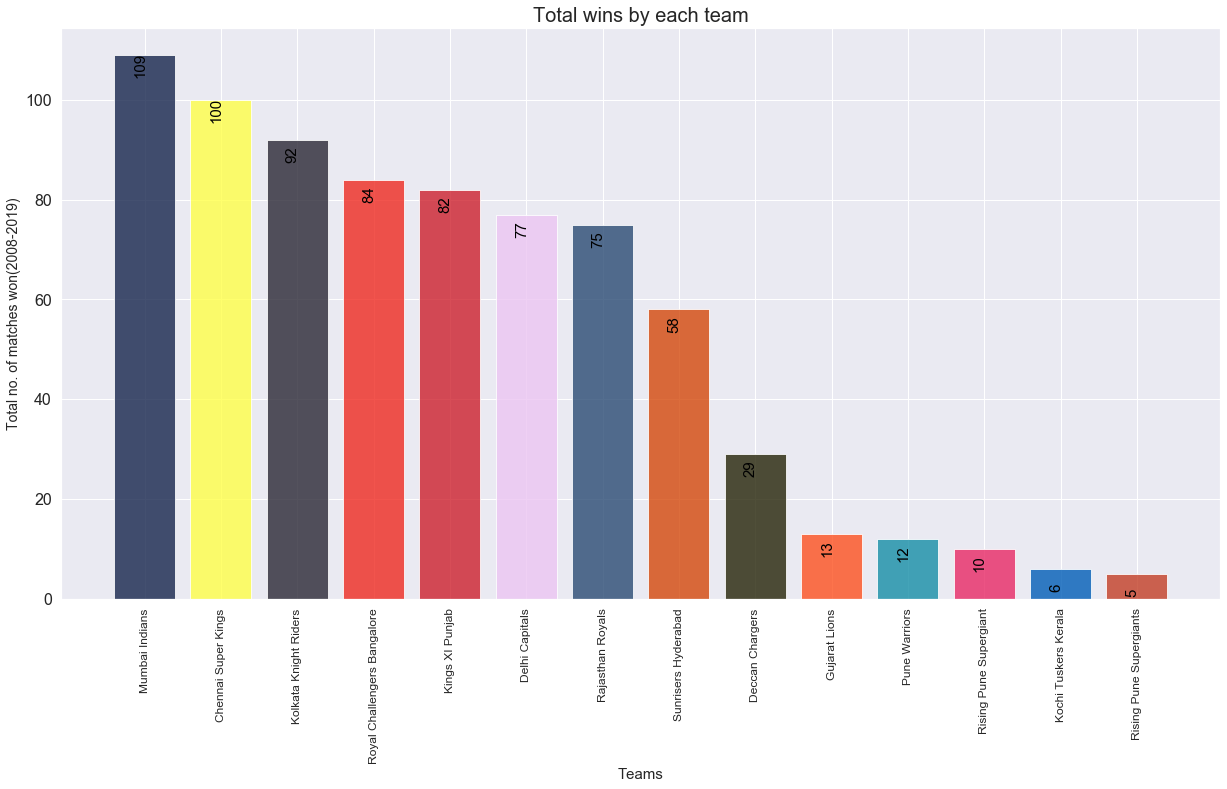

In [86]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

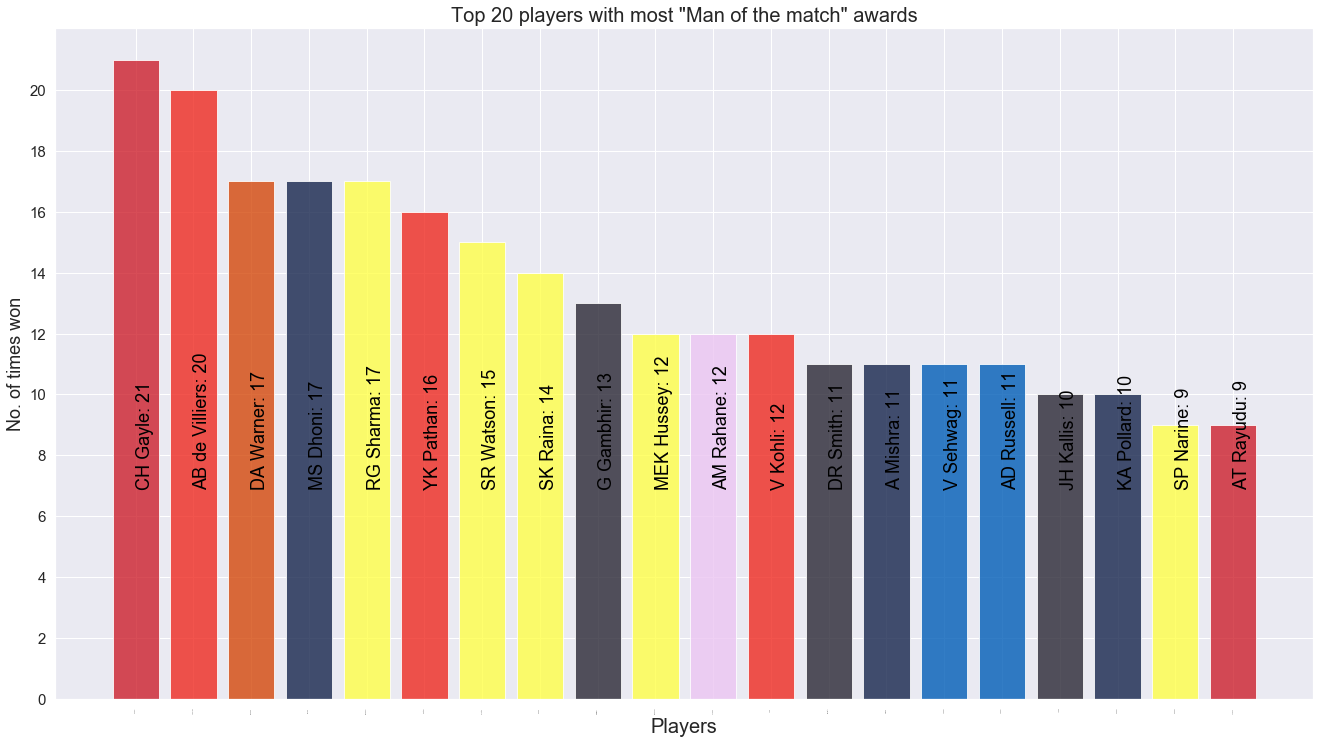

In [87]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [88]:
# Eliminating redundancy

data.loc[data['city']=='Bengaluru','city']='Bangalore'

In [89]:
midc=data[np.logical_or(np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Delhi Capitals'),np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Delhi Capitals'))]

In [90]:
# Checking for any Null Values
midc.loc[midc.isnull().values]
# Umpire 3 it Seems to be Redudant so dropping the Columns umpire3
midc=midc.iloc[:,:-1]
# After Dropping Check any Null Values present in DF
midc.isnull().values.any()

False

In [91]:
midc['winner'].value_counts()

Mumbai Indians    12
Delhi Capitals    12
Name: winner, dtype: int64

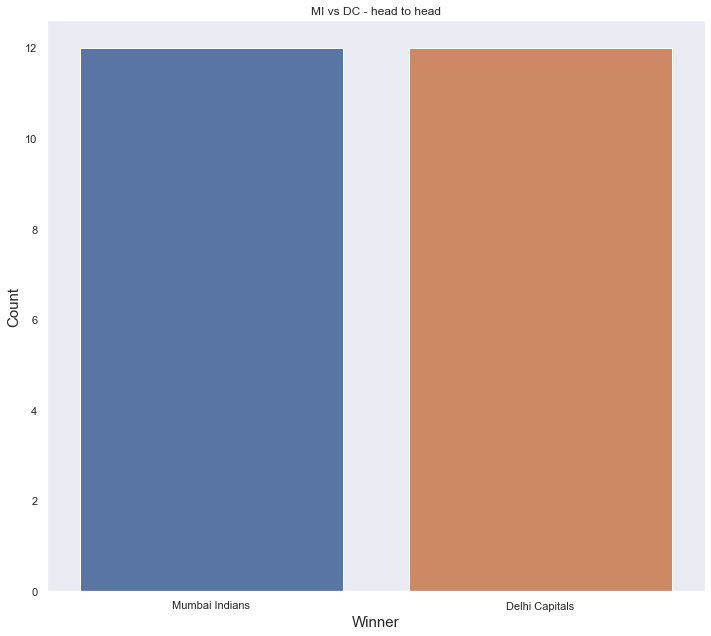

In [92]:
# MI VS DC head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(midc['winner'],order=midc['winner'].value_counts().index)
#plt.text(0.9,9,str(midc['winner'].value_counts()['Delhi Capitals']),size=29,color='white')
#plt.text(0.9,9,str(midc['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('MI vs DC - head to head')
plt.show()

# In Head 2 Head both having won 50 % 50 % matches there is equal chance of winning the Match

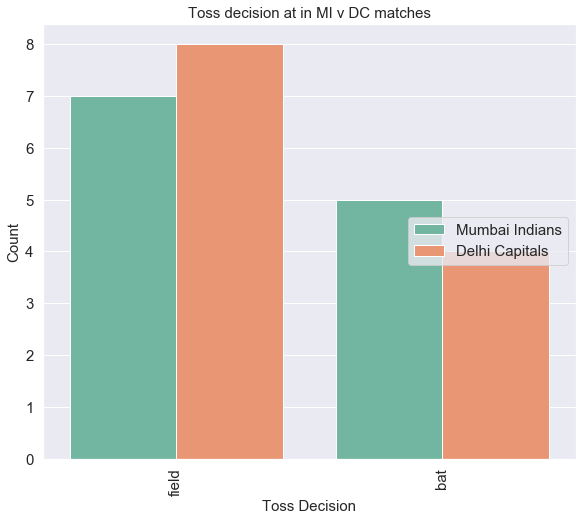

In [93]:
# Toss decision statistics for all MI v DC matches - Venue wise
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8.5,8)
sns.countplot(micsk['toss_decision'],order=micsk['toss_decision'].value_counts().index,palette='Set2',hue=midc['winner'])
plt.title('Toss decision at in MI v DC matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Toss Decision',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

In [97]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            


In [98]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Mumbai Indians
field_count = 31
bat_count = 25
Win %age if fielding is choosen = 55.35714285714286
Win %age if batting is choosen = 44.642857142857146




In [99]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Delhi Capitals
field_count = 30
bat_count = 12
Win %age if fielding is choosen = 71.42857142857143
Win %age if batting is choosen = 28.57142857142857




# Teams winning the Toss & fielding First Chances of Winning the Match

In [123]:
RS_Sh_Score.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [155]:
# Check for batsman runs
RS_Sh_Score['batsman_runs'].isnull().values.any()

# Check for match ID
RS_Sh_Score['match_id'].isnull().values.any()

False

In [132]:
# Check for Rohit Sharma Score In the Match with Each and Every Team
RS_Sh_Score=deliveries.loc[deliveries['batsman']=='RG Sharma']
Total_Match_RS_Sharma=RS_Sh_Score['match_id'].nunique()
Total_Runs_RS_Sharma=RS_Sh_Score['batsman_runs'].sum()
Average_Score_RH_Sharma= Total_Runs_RS_Sharma /  Total_Match_RS_Sharma
print('Average Score of Rohit Shamra with All teams is',Average_Score_RH_Sharma )

Average Score of Rohit Shamra with All teams is 27.0


In [141]:
# Check for Rohit Sharma Score In the Match with Delhi Capitals
RS_Sh_Score_DC=deliveries.loc[(deliveries['batsman']=='RG Sharma') & (deliveries['bowling_team']=='Delhi Capitals') ]
Total_Match_RS_Sharma_DC=RS_Sh_Score_DC['match_id'].nunique()
Total_Runs_RS_Sharma_DC=RS_Sh_Score_DC['batsman_runs'].sum()
Average_Score_RH_Sharma_DC= Total_Runs_RS_Sharma_DC /  Total_Match_RS_Sharma_DC
print('Average Score of Rohit Shamra with All teams is',Average_Score_RH_Sharma_DC )

Average Score of Rohit Shamra with All teams is 29.92


In [143]:
# Analysis say that Rohit Shamra Average Score is around 27 & 29.92 respectively
Cumm_Avrage= ( Average_Score_RH_Sharma +  Average_Score_RH_Sharma_DC)/2
print('Cumm Average Score of Rohit Shamra in this Match will be ',Cumm_Avrage )

Cumm Average Score of Rohit Shamra in this Match will be  28.46


In [165]:
deliveries['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [169]:
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

# Wickets of kagisso Rababda

In [187]:
# wickets against all teams
Kagisso_Rabadda_Matches=deliveries[(deliveries['bowler']=='K Rabada')]
Kagisso_Rabadda_Wickets=deliveries[(deliveries['bowler']=='K Rabada') & (pd.notnull(deliveries['player_dismissed']))]
KG_Wickets_matches=Kagisso_Rabadda_Matches['match_id'].nunique()
print(KG_Wickets_matches)
Total_Wickets_KG=Kagisso_Rabadda_Wickets['player_dismissed'].count()
Average_Wicket_KG_Rabbada=   Total_Wickets_KG /KG_Wickets_matches 
print('Average Wickets of KG Rabbadaa with All teams is',Average_Wicket_KG_Rabbada )

18
Average Wickets of KG Rabbadaa with All teams is 2.0


In [227]:
# wickets against mumbai indians
Kagisso_Rabadda_Matches=deliveries[(deliveries['bowler']=='K Rabada') & (deliveries['batting_team']=='Mumbai Indians') ]
Kagisso_Rabadda_Wickets=Kagisso_Rabadda_Matches[(Kagisso_Rabadda_Matches['bowler']=='K Rabada') & (pd.notnull(Kagisso_Rabadda_Matches['player_dismissed']))]
KG_Wickets_matches=Kagisso_Rabadda_Matches['match_id'].nunique()
print(KG_Wickets_matches)
Total_Wickets_KG=Kagisso_Rabadda_Wickets['player_dismissed'].count()
print(Total_Wickets_KG)
Average_Wicket_KG_Rabbada=   Total_Wickets_KG /KG_Wickets_matches 
print('Average Wicket of KG Rabbada with All teams is',Average_Wicket_KG_Rabbada )

4
7
Average Wicket of KG Rabbada with All teams is 1.75


# Average Wicket of KG Rabadda with mumbai Indians is 2 Wickets

In [ ]:
# Wides in Total Match

In [191]:
# TOtal Wides till now as of Date in Data
deliveries['wide_runs'].sum()


6576

In [224]:
Wide_Runs_M=deliveries[(deliveries['bowling_team']=='Mumbai Indians') ]
Wide_Runs_D = deliveries[(deliveries['bowling_team']=='Delhi Capitals') ]

# Check for any Null values
Wide_Runs_M['wide_runs'].isnull().values.any()
# Check for any Null values
Wide_Runs_D['wide_runs'].isnull().values.any()
Total_matches_M =Wide_Runs_M['match_id'].nunique()
Total_matches_D =Wide_Runs_D['match_id'].nunique()
Total_Wide_M=Wide_Runs_M['wide_runs'].sum()
Total_Wide_D=Wide_Runs_D['wide_runs'].sum()
print(Total_Wide_D)
Average_Wide_of_M_team =  Total_Wide_M /  Total_matches_M

Average_Wide_of_D_team =  Total_Wide_D /  Total_matches_D

print('Average Wide of MumbaiIndians team',Average_Wide_of_M_team )
print('Average Wide of DC team',Average_Wide_of_D_team )

728
Average Wide of MumbaiIndians team 4.770053475935829
Average Wide of DC team 4.136363636363637


In [225]:
# Wide Against Each other Mumbai Indians & Delhi Capitals
Wide_Runs_M=deliveries[(deliveries['bowling_team']=='Mumbai Indians') & (deliveries['batting_team']=='Delhi Capitals') ]
Wide_Runs_D = deliveries[(deliveries['bowling_team']=='Delhi Capitals') & (deliveries['batting_team']=='Mumbai Indians') ]

# Check for any Null values
Wide_Runs_M['wide_runs'].isnull().values.any()
# Check for any Null values
Wide_Runs_D['wide_runs'].isnull().values.any()
Total_matches_M =Wide_Runs_M['match_id'].nunique()
Total_matches_D =Wide_Runs_D['match_id'].nunique()
Total_Wide_M=Wide_Runs_M['wide_runs'].sum()
Total_Wide_D=Wide_Runs_D['wide_runs'].sum()
print(Total_Wide_D)
Average_Wide_of_M_team =  Total_Wide_M /  Total_matches_M

Average_Wide_of_D_team =  Total_Wide_D /  Total_matches_D

print('Average Wide of MumbaiIndians team',Average_Wide_of_M_team )
print('Average Wide of DC team',Average_Wide_of_D_team )

134
Average Wide of MumbaiIndians team 3.875
Average Wide of DC team 5.583333333333333


In [226]:
# Average Wide of Mumbai Indians against DC is 4
# Aevrage Wide of DC against Mumbai Indians is 6
# total Wides can be around 8 ~ 10